In [7]:
#importing everything that I will need or might need.
import json
import csv
import tweepy
import re

In [10]:
#Creating a function
def search_for_hashtags(consumer_key, consumer_secret, access_token, access_token_secret, hashtag_phrase):
    
    #create authentication for accessing Twitter
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)

    #initialize Tweepy API
    api = tweepy.API(auth)
    
    #get the name of the spreadsheet we will write to
    fname = 'data.csv'

    #open the spreadsheet we will write to
    #write only
    with open(fname, 'w') as file:

        w = csv.writer(file)

        #write coloumn rows to spreadsheet
        w.writerow(['timestamp', 'tweet_text', 'username', 'all_hashtags', 'followers_count'])

        #for each tweet matching our hashtags, write relevant info to the spreadsheet
        for tweet in tweepy.Cursor(api.search, q=hashtag_phrase+' -filter:retweets', \
                                   lang="en", tweet_mode='extended').items(100):
            w.writerow([tweet.created_at, tweet.full_text.replace('\n',' ').encode('utf-8'), tweet.user.screen_name.encode('utf-8'), [e['text'] for e in tweet._json['entities']['hashtags']], tweet.user.followers_count])

In [12]:
#adding all the necessary keys
consumer_key = 'k0RpGuCKJuL04TXMQ0MVB7GON'  
consumer_secret = '5bRvds4rCUMpcHv9L8QpDcfc9SD0fkT0bOymx7iBMojQkiN8Mp'  
access_token = '1291331055702683648-CdzK0x4W4MGAyw91VzllAlLGv9SGDI'  
access_token_secret = 'NImfRcTEay6aADwShtTmsIA0hCyjIq3t1RvIQf3SWUW9k' 

#I want all tweets with this hashtag
hashtag_phrase = '#python'

#call function
if __name__ == '__main__':
    search_for_hashtags(consumer_key, consumer_secret, access_token, access_token_secret, hashtag_phrase)

In [28]:
#showing data visually

import pandas as pd
python_df = pd.read_json('C:/Users/nadin/Desktop/twitter2.json')
python_df.head(10)

,id,timestamp,tweet_text,username,all_hashtags,followers_count
0,1,2020-08-06 14:29:11,b'Some comparisons are truly out of the world....,b'AnalyticsSteps',"['rprogramming', 'rprogramminglanguage', 'rpro...",51
1,2,2020-08-06 14:27:30,"b""Presenting to you #TechThursday by @pyladies...",b'pyladieschennai',"['TechThursday', 'TechThursday', 'womenintech'...",256
2,3,2020-08-06 14:27:28,"b""We've been through all stages of web crawlin...",b'yashvardhan_sri',"['python', 'selenium', 'scrapinghub', 'scrapy']",123
3,4,2020-08-06 14:26:51,b'Want to create a Deep Learning framework fro...,b'Robofied',"['machinelearning', 'deeplearning', 'naturalla...",45
4,5,2020-08-06 14:26:10,b'Continuing the #Python train until end of De...,b'jdorow19',"['Python', 'codinglife']",498
5,6,2020-08-06 14:25:24,"b""It's been awhile since our last milestone bu...",b'anne_engineer',"['CircuitPython', 'Python', 'MicroPython']",1370
6,7,2020-08-06 14:24:17,b'#Python and #Django #FullStack #WebDeveloper...,b'byLilyV',"['Python', 'Django', 'FullStack', 'WebDevelope...",21692
7,8,2020-08-06 14:24:07,b'Deep Learning and Computer Vision A-Z\xe2\x8...,b'FreeHipwee',"['udemyfree', 'udemycoupon', 'DataScience', 'D...",375
8,9,2020-08-06 14:23:37,b'Precious Metals per 1 oz. Silver $28.27 Pla...,b'OfficialMining',"['SEO', 'Copywriting', 'SocialMedia', 'entrepr...",23435
9,10,2020-08-06 14:23:00,b'Watch the replay of our webinar with @miguel...,b'Develop',['Python'],691


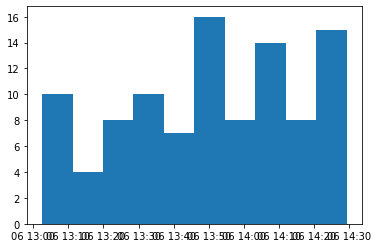

In [36]:
import matplotlib.pyplot as plt

plt.hist(python_df['timestamp'],bins=10)


plt.show()

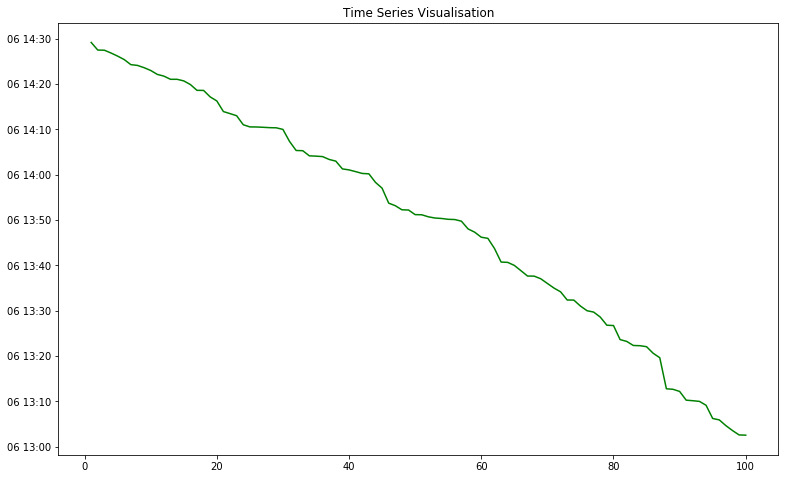

In [37]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(10,6))

ax1=fig.add_axes([0,0,1,1])
#ax2=fig.add_axes([0.05,0.65,0.5,0.6])

ax1.set_title('Time Series Visualisation')

ax1.plot(patients_df['id'],patients_df['timestamp'],color='green')

plt.show()